# Assignment 2 - Alarm Data Challenge

(This text is copied in from the Course Handbook.)

### Brief

Carry out a structured analysis of a portion of the data provided by your data holder. This should be structured as follows. This assignment is carried out with your group project. However, each student has to hand in their ​own​ and individual analysis. Within each group, students should decide that each student is doing an independent piece of analysis on a different part of the data.

* **Describe**: tell us about the data that you have. We expect to see:
    * what is the general type of the data (tabular, network, geographical, textual etc.),
    * how large and complex is it (rows/columns, size, variation, structure)
    * What fields and data types are present (max/min, levels for categorical values).     
    * Links between this data and other data (e.g. foreign keys, unique ids)
    * Summary statistics about the data - how many people, what time frame, field averages etc.
    * How does the data relate to the questions that the data owner has discussed with you?


* **Explore**: carry out a deeper exploration of the data. This includes looking at individual fields/variables to see the distribution of values they take (e.g. evenly distributed, bell curves, bi-modal) or how they are distributed in time. It also includes relationships between variables in your dataset: are there correlations? In which direction? Complex curves? We would expect to see roughly:
    * 4-5 exploratory visualisations, presented in a readable form, with an explanation about what you have found
    * 1-2 relationships between variables analysed
    * Ideas about trends, outliers, clusters
    * Reference to statistics, i.e. a sense of which relationships are significant, and what claims you can back up.


* **Reflect and Hypothesise**: What do you think might be behind the relationships and distributions that you have found? How does your data relate to the world? In short, what hypotheses came up as you explored the data, and how would you go about testing them? We would expect to see:    
    * A 200 word reflection on the data
    * 3-5 hypotheses with an explanation of:
        * What your hypothesis is
        * why you think that (referring to your graphs)
        * How you could go about testing it (note that this may include: further studies, asking the data owner, using some advanced algorithms, checking each data point individually, etc..)
  
  NOTE: You don’t have to actually test the hypotheses - you just have to demonstrate that you have plausibly thought about how you would test them.


### Submission

Each student should be submit an individual Jupyter notebook, with all of the output present, which we can run. Some notes:
* If you have installed nonstandard packages, document what they are and how to install them.
* You only need to submit your notebook through Learn - we will organise the data separately as some of you have large/private databases.
* Make sure you have saved your notebook *with the output*, so we can immediately see your graphs etc.
* Make sure you document which files are used at which point in the analysis.
* Plagiarism is treated extremely seriously! You may be working on the same data, but we would expect to see different reports. In particular, the explorations should not be the same between members of the group. Discussion is absolutely fine and encouraged - wholesale copying is not.

## Set Up

In [1]:
# Necessary import
import pandas as pd
import numpy as np
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Describe and Initially Clean 

There are four data sheets for this project
* CustomerDataAnon.xlsx
* CC Data 2020.xlsx
* Services Data 2020 v2.csv
* Service type.xlsx

Briefly, based on the group division of labor, I will attempt to analyse the relationship between customer-specific identities (e.g., gender, age) and alarm behavior, so the primary data tables of interest are Customer Data Anon, Services Data 2020, and Service Type.

I am going to look at them first based on the information provided by the data holder and the direction I have chosen to analyse them. In the process of looking at them, I found some obvious problems with the dataset itself, such as columns with almost all null values, rows with misplaced data, etc.; I also found some problems that were not easy to correlate and analyze later, such as data types that were not easy to handle, key data with null values, etc., so I did a preliminary cleaning for these problems first.

### 1. Customer Data

The table contains information about some of the Blackwood customers (gender, age, birthday, health), each customer has a unique ID. This ID can be associated with the External ID in the Service Data, in order to analyse the relationship between a particular customer group and a specific service request.

In [2]:
CustomerData = pd.read_excel('CustomerDataAnon.xlsx')

CustomerData.head()

,ID,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition
0,4711,F,1955-06-25,65.0,NaN,Cerebral Palsy
1,4732,F,1958-02-27,62.0,NaN,NaN
2,4743,F,1966-03-02,54.0,NaN,Learning Difficulties
3,4745,F,1950-07-12,70.0,NaN,NaN
4,4763,M,1956-04-16,64.0,NaN,Cerebral Palsy


Have a look at the information in the table itself, including the number of rows, columns, data types, null values, etc.

In [3]:
CustomerData.columns

Index(['ID', 'Gender', 'DateOfBirth', 'Age', 'StaffPlanConditions',
       'CareSysCondition'],
      dtype='object')

In [4]:
CustomerData.shape

(441, 6)

In [5]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   441 non-null    int64         
 1   Gender               441 non-null    object        
 2   DateOfBirth          440 non-null    datetime64[ns]
 3   Age                  440 non-null    float64       
 4   StaffPlanConditions  79 non-null     object        
 5   CareSysCondition     352 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 20.8+ KB


In [6]:
CustomerData.describe()

,ID,Age
count,441.00000,440.000000
mean,7620.76644,64.679545
std,1409.87353,19.110148
min,4711.00000,2.000000
25%,6182.00000,51.000000
50%,8346.00000,65.000000
75%,8814.00000,82.000000
max,9035.00000,101.000000


In [7]:
#CustomerData['Age'].astype('int')

Next take a look at some of the key columns.

In [8]:
# Have a look at some of the key columns
CustomerData['ID'].value_counts()

7741    4
6165    4
8305    3
7735    3
6264    2
       ..
5783    1
8198    1
4763    1
7839    1
6148    1
Name: ID, Length: 417, dtype: int64

As you can see, the table contains 417 different user IDs and there are duplicate ID records. I tried to find the cause of this and do some cleaning.

I tried removing completely duplicate rows and found that there was no duplicate data.

In [9]:
CustomerData_dp = CustomerData[CustomerData.duplicated()]
print(CustomerData_dp)
#CustomerData1 = CustomerData.drop_duplicates(subset='ID', keep='last')
#CustomerData1

Empty DataFrame
Columns: [ID, Gender, DateOfBirth, Age, StaffPlanConditions, CareSysCondition]
Index: []


Based on the information provided by the data holder: ‘There may be multiple lines where a customer has more than one reported condition, Caresys and staffplan hold medical data so this is why you may get different conditions or the same condition in each.’ I think the duplicate IDs appear because they have more than one Disabling Conditions record.

So check the Disabling Conditions recorded by both agencies first.

In [10]:
CustomerData['StaffPlanConditions'].value_counts()

Epilepsy                                              8
Dementia                                              6
Visual Impairment                                     6
Cerebal Palsy                                         6
Poor mobility                                         5
Multiple Sclerosis                                    4
Alzheimers                                            4
Brain Injury                                          4
Stroke                                                4
Arthitis                                              3
Blind                                                 3
Spina Bifida                                          3
Spinal Injury                                         3
Mentally Ill                                          2
COPD                                                  2
Incontinence                                          2
Hearing Impairment                                    2
Huntingtons                                     

In [11]:
CustomerData['CareSysCondition'].value_counts()

Elderly Care/Support        81
Cerebral Palsy              31
Mental Health Issues        31
Dementia                    26
Multiple Sclerosis          22
Brain Injury                22
Learning Difficulties       20
Lifelong Mobility Issues    19
Stroke                      15
Epilepsy                    11
Spina Bifida                10
Diabetes                     8
Cancer                       8
COPD                         7
Visual Impairment            6
Spinal Injury                6
Arthritis                    6
Parkinsons                   5
Huntington's                 4
Bi Polar Disorder            3
Amputee                      2
Asthma                       2
Physical Injury              2
OCD                          2
Addiction Issues             1
Down Syndrome                1
Muscular Dystrophy           1
Name: CareSysCondition, dtype: int64

Create a new column to merge the two different Disabling Conditions columns.

In [12]:
#CustomerData['Conditions'] = CustomerData[['StaffPlanConditions', 'CareSysCondition']].agg(', '.join, axis=1)
CustomerData['DisablingConditions'] = CustomerData[['StaffPlanConditions', 'CareSysCondition']].stack().groupby(level=0).agg(','.join)
CustomerData

,ID,Gender,DateOfBirth,Age,StaffPlanConditions,CareSysCondition,DisablingConditions
0,4711,F,1955-06-25,65.0,NaN,Cerebral Palsy,Cerebral Palsy
1,4732,F,1958-02-27,62.0,NaN,NaN,NaN
2,4743,F,1966-03-02,54.0,NaN,Learning Difficulties,Learning Difficulties
3,4745,F,1950-07-12,70.0,NaN,NaN,NaN
4,4763,M,1956-04-16,64.0,NaN,Cerebral Palsy,Cerebral Palsy
...,...,...,...,...,...,...,...
436,9024,M,1969-06-15,51.0,NaN,Lifelong Mobility Issues,Lifelong Mobility Issues
437,9032,F,1926-03-14,94.0,NaN,Elderly Care/Support,Elderly Care/Support
438,9033,F,1947-03-26,73.0,NaN,Elderly Care/Support,Elderly Care/Support
439,9034,M,1933-05-07,87.0,NaN,Cancer,Cancer


Since I already have the aggregated data, I can delete the records under StaffPlanConditions and CareSysCondition separately.

In [13]:
CustomerData = CustomerData.drop(columns=['StaffPlanConditions', 'CareSysCondition'])

For the empty values in the Conditions column, I thought it meant that this customer's Disabling Conditions were undocumented or it's healthy, so I filled those null values with 'None'.

In [14]:
CustomerData['DisablingConditions'] = CustomerData['DisablingConditions'].fillna('None')
CustomerData

,ID,Gender,DateOfBirth,Age,DisablingConditions
0,4711,F,1955-06-25,65.0,Cerebral Palsy
1,4732,F,1958-02-27,62.0,None
2,4743,F,1966-03-02,54.0,Learning Difficulties
3,4745,F,1950-07-12,70.0,None
4,4763,M,1956-04-16,64.0,Cerebral Palsy
...,...,...,...,...,...
436,9024,M,1969-06-15,51.0,Lifelong Mobility Issues
437,9032,F,1926-03-14,94.0,Elderly Care/Support
438,9033,F,1947-03-26,73.0,Elderly Care/Support
439,9034,M,1933-05-07,87.0,Cancer


Now, I'm looking at the information in that data table again and I see that there are null values in the Date of Birth and Age columns.

In [15]:
CustomerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 441 entries, 0 to 440
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   441 non-null    int64         
 1   Gender               441 non-null    object        
 2   DateOfBirth          440 non-null    datetime64[ns]
 3   Age                  440 non-null    float64       
 4   DisablingConditions  441 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 17.4+ KB


In [16]:
CustomerData[CustomerData.isnull().T.any()]

,ID,Gender,DateOfBirth,Age,DisablingConditions
174,7839,U,NaT,NaN,None


With the above line of code, I noticed that both null values appear on the same line and that this record does not have a specific record for Gender and Disabling Conditions. I reckoned that this line of information didn't make sense for my project and decided to delete it.

In [17]:
CustomerData = CustomerData.dropna(axis=0, how='any')

Next, I merged the different Disabling Conditions based on the same ID, gender, date of birth, and age to get a mostly clean data table.

In [18]:
CustomerData = CustomerData.groupby(['ID', 'Gender', 'DateOfBirth','Age'])['DisablingConditions'].agg(', '.join).reset_index()
CustomerData

,ID,Gender,DateOfBirth,Age,DisablingConditions
0,4711,F,1955-06-25,65.0,Cerebral Palsy
1,4732,F,1958-02-27,62.0,None
2,4743,F,1966-03-02,54.0,Learning Difficulties
3,4745,F,1950-07-12,70.0,None
4,4763,M,1956-04-16,64.0,Cerebral Palsy
...,...,...,...,...,...
411,9024,M,1969-06-15,51.0,Lifelong Mobility Issues
412,9032,F,1926-03-14,94.0,Elderly Care/Support
413,9033,F,1947-03-26,73.0,Elderly Care/Support
414,9034,M,1933-05-07,87.0,Cancer


We can get more accurate information such as sex ratio, age distribution, etc. from this clean data sheet. These will be shown further on.

In [19]:
CustomerData['Gender'].value_counts()

F    223
M    185
U      8
Name: Gender, dtype: int64

In [20]:
CustomerData['DisablingConditions'].value_counts()

Elderly Care/Support                                                                                                                                  79
None                                                                                                                                                  70
Mental Health Issues                                                                                                                                  31
Cerebral Palsy                                                                                                                                        20
Lifelong Mobility Issues                                                                                                                              17
                                                                                                                                                      ..
Mentally Ill                                      ,Brain Injury                   

In [21]:
CustomerData['Age'].value_counts()

84.0     16
51.0     13
82.0     13
90.0     12
76.0     12
         ..
101.0     1
6.0       1
77.0      1
36.0      1
99.0      1
Name: Age, Length: 82, dtype: int64

I converted some columns of data types for easier subsequent processing.

In [22]:
# Convert ID to int (de-floating) and then to str
CustomerData['ID'] = CustomerData['ID'].astype('int16').astype('str')
# Convert Age to int
CustomerData['Age'] = CustomerData['Age'].astype('int16')
CustomerData_cl = CustomerData.reset_index(drop=True)
CustomerData_cl.head()

,ID,Gender,DateOfBirth,Age,DisablingConditions
0,4711,F,1955-06-25,65,Cerebral Palsy
1,4732,F,1958-02-27,62,None
2,4743,F,1966-03-02,54,Learning Difficulties
3,4745,F,1950-07-12,70,None
4,4763,M,1956-04-16,64,Cerebral Palsy


Finally, check the ID to make sure there are no duplicates, which means I've successfully merged the appropriate data for my needs. Now we can move on to the next table.

In [23]:
CustomerData_cl['ID'].value_counts()

8518    1
4775    1
5709    1
8645    1
8383    1
       ..
9007    1
8479    1
8326    1
8880    1
8849    1
Name: ID, Length: 416, dtype: int64

### 2. Services Data

The table is mainly based on different service items, which describe the status of the service, the service object (ID), and the start and end time of the service, respectively. In addition, according to the information provided by the data holder, each external customer has a unique External ID, which is a key identifier that can be associated with the ID in the Customer Data.

In [24]:
ServicesData = pd.read_csv('Services Data 2020 v2.csv')

ServicesData.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (4,10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ServiceName,VisitorID,Unnamed: 2,Status,ExternalID,StartTime,EndTime,FirstActiveTime,FirstResponsibleTime,FirstCompletedTime,AcceptDuration,ComplateDuration,TotalDuration,Unnamed: 13
0,Personal Care,B03347CE-9AB6-4A2B-8866-D9940F57B298,NaN,planned,7741,29/10/2018 00:00,29/10/2018 00:30,NaN,NaN,NaN,0,0,0,NaN
1,Personal Care,B03347CE-9AB6-4A2B-8866-D9940F57B298,NaN,planned,7741,29/10/2018 00:00,29/10/2018 00:30,NaN,NaN,NaN,0,0,0,NaN
2,Customer in Hospital,BEE22A4A-C5C9-4008-BD71-BB311E08CDB4,NaN,planned,5087,29/10/2018 00:00,02/11/2018 00:00,NaN,NaN,NaN,0,0,0,NaN
3,Pull Cord Alarm,50082C31-0384-4B63-AD5C-DFEFEA5386B8,NaN,completed,5283,29/10/2018 00:15,29/10/2018 00:30,29/10/2018 00:15,29/10/2018 00:46,29/10/2018 00:46,1893,2,1895,NaN
4,Personal Care,7BDF8891-004F-46DF-8FA5-1D623B36D6F7,NaN,planned,5537,29/10/2018 00:30,29/10/2018 01:00,NaN,NaN,NaN,0,0,0,NaN


Since there was an alert related to low_memory, I'd like to see information about the data table itself, including the number of rows, columns, data types, null values, memory size occupied, etc.

In [25]:
ServicesData.columns

Index(['ServiceName', 'VisitorID', 'Unnamed: 2', 'Status', 'ExternalID',
       'StartTime', 'EndTime', 'FirstActiveTime', 'FirstResponsibleTime',
       'FirstCompletedTime', 'AcceptDuration', 'ComplateDuration',
       'TotalDuration', 'Unnamed: 13'],
      dtype='object')

In [26]:
ServicesData.shape

(1048575, 14)

In [27]:
ServicesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ServiceName           1048575 non-null  object 
 1   VisitorID             1048575 non-null  object 
 2   Unnamed: 2            0 non-null        float64
 3   Status                1048575 non-null  object 
 4   ExternalID            1010134 non-null  object 
 5   StartTime             1048575 non-null  object 
 6   EndTime               1048575 non-null  object 
 7   FirstActiveTime       434321 non-null   object 
 8   FirstResponsibleTime  620223 non-null   object 
 9   FirstCompletedTime    601734 non-null   object 
 10  AcceptDuration        1048574 non-null  object 
 11  ComplateDuration      1048575 non-null  int64  
 12  TotalDuration         1048575 non-null  int64  
 13  Unnamed: 13           4 non-null        float64
dtypes: float64(2), int64(2), object(10

In [28]:
ServicesData.describe()

,Unnamed: 2,ComplateDuration,TotalDuration,Unnamed: 13
count,0.0,1.048575e+06,1.048575e+06,4.00
mean,NaN,2.745107e+03,9.218389e+04,9030.75
std,NaN,1.634014e+05,3.269199e+05,18061.50
min,NaN,0.000000e+00,0.000000e+00,0.00
25%,NaN,0.000000e+00,0.000000e+00,0.00
50%,NaN,0.000000e+00,0.000000e+00,0.00
75%,NaN,4.400000e+01,5.400000e+01,9030.75
max,NaN,4.713999e+07,4.714000e+07,36123.00


As you can see from some of the output above, Unnamed:2 is all null, so I've removed it first. Also, Unnamed: 13 is very strange in that it only has four non-null values, so I'll find them and see what's going on.

In [29]:
# Delete the all-null value column Unnamed: 2
ServicesData = ServicesData.dropna(axis=1,how='all') 
ServicesData.head()

,ServiceName,VisitorID,Status,ExternalID,StartTime,EndTime,FirstActiveTime,FirstResponsibleTime,FirstCompletedTime,AcceptDuration,ComplateDuration,TotalDuration,Unnamed: 13
0,Personal Care,B03347CE-9AB6-4A2B-8866-D9940F57B298,planned,7741,29/10/2018 00:00,29/10/2018 00:30,NaN,NaN,NaN,0,0,0,NaN
1,Personal Care,B03347CE-9AB6-4A2B-8866-D9940F57B298,planned,7741,29/10/2018 00:00,29/10/2018 00:30,NaN,NaN,NaN,0,0,0,NaN
2,Customer in Hospital,BEE22A4A-C5C9-4008-BD71-BB311E08CDB4,planned,5087,29/10/2018 00:00,02/11/2018 00:00,NaN,NaN,NaN,0,0,0,NaN
3,Pull Cord Alarm,50082C31-0384-4B63-AD5C-DFEFEA5386B8,completed,5283,29/10/2018 00:15,29/10/2018 00:30,29/10/2018 00:15,29/10/2018 00:46,29/10/2018 00:46,1893,2,1895,NaN
4,Personal Care,7BDF8891-004F-46DF-8FA5-1D623B36D6F7,planned,5537,29/10/2018 00:30,29/10/2018 01:00,NaN,NaN,NaN,0,0,0,NaN


In [30]:
# View Unnamed: 13 rows with non-null values in the column
ServicesData[ServicesData['Unnamed: 13'].notna()]

,ServiceName,VisitorID,Status,ExternalID,StartTime,EndTime,FirstActiveTime,FirstResponsibleTime,FirstCompletedTime,AcceptDuration,ComplateDuration,TotalDuration,Unnamed: 13
84243,Help to go to bed,extra assistance,Margaret Reid,completed,5534,28/12/2018 22:43,28/12/2018 22:58,NaN,28/12/2018 23:02,28/12/2018 23:02,0,1,0.0
152369,Help to go to bed,extra assistance,Margaret Reid,completed,5539,10/02/2019 16:52,10/02/2019 17:07,NaN,10/02/2019 16:55,10/02/2019 16:55,0,1,0.0
817323,Help to go to bed,extra assistance,,active,5347,29/04/2020 16:14,29/04/2020 16:29,29/04/2020 16:15,NaN,NaN,0,0,0.0
969937,Help to go to bed,extra assistance,,completed,5293,16/08/2020 01:21,16/08/2020 01:36,16/08/2020 01:21,16/08/2020 11:23,16/08/2020 11:23,36123,0,36123.0


Upon review, I found that these four rows of data have data misalignment issues and two of them contain employee name data that was not deleted clean (Data holder previously described this data as private and should be deleted). Since none of the four rows of data are related to Alarm data and will not be used in my project, I considered deleting them for now. Finally, I deleted the column Unnamed: 13 with a completely null value as well.

In [31]:
# Delete the rows with non-null values in column Unnamed: 13
ServicesData = ServicesData.drop(labels=[84243, 152369, 817323, 969937], axis=0)

# Delete the column Unnamed: 13
ServicesData = ServicesData.dropna(axis=1,how='all') 

In [32]:
ServicesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1048571 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   ServiceName           1048571 non-null  object
 1   VisitorID             1048571 non-null  object
 2   Status                1048571 non-null  object
 3   ExternalID            1010130 non-null  object
 4   StartTime             1048571 non-null  object
 5   EndTime               1048571 non-null  object
 6   FirstActiveTime       434317 non-null   object
 7   FirstResponsibleTime  620221 non-null   object
 8   FirstCompletedTime    601731 non-null   object
 9   AcceptDuration        1048571 non-null  object
 10  ComplateDuration      1048571 non-null  int64 
 11  TotalDuration         1048571 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 104.0+ MB


External ID is a unique identifier that can be associated with Customer Data. I decided to delete the rows in this column that have null values because they cannot be associated with Customer Data and lack value in my analysis. Deleting it also reduces the amount of redundant data and facilitates subsequent processing and analysis.

In [33]:
# Clean the row with a null External ID
ServicesData = ServicesData.dropna(axis=0, subset=['ExternalID'])
ServicesData.shape

(1010130, 12)

Next I converted some columns with data type ‘object’ to a more convenient data type for subsequent processing, such as int and datetime.

When converting to int, I chose to convert them to int16 because data in the millions of rows is slower to process and the current data does not require high data precision. Reducing the precision will reduce memory usage and increase processing speed.

In [34]:
# Convert columns related to duration, such as AcceptDuration, to int16
ServicesData['AcceptDuration'] = ServicesData['AcceptDuration'].astype('int16', errors='ignore')
ServicesData['ComplateDuration'] = ServicesData['ComplateDuration'].astype('int16', errors='ignore')
ServicesData['TotalDuration'] = ServicesData['TotalDuration'].astype('int16', errors='ignore')

In [35]:
# Convert ExternalID to int and then to str to facilitate the association with CostumorData datasets later
ServicesData['ExternalID'] = ServicesData['ExternalID'].astype('int16').astype('str')

In [36]:
# Convert time-related columns to datetime.
ServicesData['StartTime'] = pd.to_datetime(ServicesData['StartTime'], infer_datetime_format=True)
ServicesData['EndTime'] = pd.to_datetime(ServicesData['EndTime'], infer_datetime_format=True)
ServicesData['FirstActiveTime'] = pd.to_datetime(ServicesData['FirstActiveTime'], infer_datetime_format=True)
ServicesData['FirstResponsibleTime'] = pd.to_datetime(ServicesData['FirstResponsibleTime'], infer_datetime_format=True)
ServicesData['FirstCompletedTime'] = pd.to_datetime(ServicesData['FirstCompletedTime'], infer_datetime_format=True)

Now let's take a look at the results and you can see that they have been converted to a data type that is easy to process later.

In [37]:
ServicesData.info()
ServicesData.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010130 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   ServiceName           1010130 non-null  object        
 1   VisitorID             1010130 non-null  object        
 2   Status                1010130 non-null  object        
 3   ExternalID            1010130 non-null  object        
 4   StartTime             1010130 non-null  datetime64[ns]
 5   EndTime               1010130 non-null  datetime64[ns]
 6   FirstActiveTime       398258 non-null   datetime64[ns]
 7   FirstResponsibleTime  590644 non-null   datetime64[ns]
 8   FirstCompletedTime    573411 non-null   datetime64[ns]
 9   AcceptDuration        1010130 non-null  int16         
 10  ComplateDuration      1010130 non-null  int16         
 11  TotalDuration         1010130 non-null  int16         
dtypes: datetime64[ns](5), int16(3), object(4)


,ServiceName,VisitorID,Status,ExternalID,StartTime,EndTime,FirstActiveTime,FirstResponsibleTime,FirstCompletedTime,AcceptDuration,ComplateDuration,TotalDuration
0,Personal Care,B03347CE-9AB6-4A2B-8866-D9940F57B298,planned,7741,2018-10-29 00:00:00,2018-10-29 00:30:00,NaT,NaT,NaT,0,0,0
1,Personal Care,B03347CE-9AB6-4A2B-8866-D9940F57B298,planned,7741,2018-10-29 00:00:00,2018-10-29 00:30:00,NaT,NaT,NaT,0,0,0
2,Customer in Hospital,BEE22A4A-C5C9-4008-BD71-BB311E08CDB4,planned,5087,2018-10-29 00:00:00,2018-11-02 00:00:00,NaT,NaT,NaT,0,0,0
3,Pull Cord Alarm,50082C31-0384-4B63-AD5C-DFEFEA5386B8,completed,5283,2018-10-29 00:15:00,2018-10-29 00:30:00,2018-10-29 00:15:00,2018-10-29 00:46:00,2018-10-29 00:46:00,1893,2,1895
4,Personal Care,7BDF8891-004F-46DF-8FA5-1D623B36D6F7,planned,5537,2018-10-29 00:30:00,2018-10-29 01:00:00,NaT,NaT,NaT,0,0,0


In [38]:
ServicesData.sort_values(by='StartTime')

,ServiceName,VisitorID,Status,ExternalID,StartTime,EndTime,FirstActiveTime,FirstResponsibleTime,FirstCompletedTime,AcceptDuration,ComplateDuration,TotalDuration
0,Personal Care,B03347CE-9AB6-4A2B-8866-D9940F57B298,planned,7741,2018-10-29 00:00:00,2018-10-29 00:30:00,NaT,NaT,NaT,0,0,0
1,Personal Care,B03347CE-9AB6-4A2B-8866-D9940F57B298,planned,7741,2018-10-29 00:00:00,2018-10-29 00:30:00,NaT,NaT,NaT,0,0,0
2,Customer in Hospital,BEE22A4A-C5C9-4008-BD71-BB311E08CDB4,planned,5087,2018-10-29 00:00:00,2018-11-02 00:00:00,NaT,NaT,NaT,0,0,0
3,Pull Cord Alarm,50082C31-0384-4B63-AD5C-DFEFEA5386B8,completed,5283,2018-10-29 00:15:00,2018-10-29 00:30:00,2018-10-29 00:15:00,2018-10-29 00:46:00,2018-10-29 00:46:00,1893,2,1895
4,Personal Care,7BDF8891-004F-46DF-8FA5-1D623B36D6F7,planned,5537,2018-10-29 00:30:00,2018-10-29 01:00:00,NaT,NaT,NaT,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,Alarm,B86A1DA3-85A9-468A-90FE-D50BCA54268D,completed,8734,2020-10-06 18:06:00,2020-10-06 18:16:00,2020-10-06 18:06:00,2020-10-06 18:49:00,2020-10-06 18:49:00,2576,1,2577
1048571,Alarm,B86A1DA3-85A9-468A-90FE-D50BCA54268D,completed,8734,2020-10-06 18:07:00,2020-10-06 18:17:00,2020-10-06 18:07:00,2020-10-06 18:49:00,2020-10-06 18:49:00,2568,2,2570
1048572,e-Expert low Battery,BFEB78EF-A1B4-4D22-9821-7768C47C4558,active,5876,2020-10-06 18:07:00,2020-10-06 18:12:00,2020-10-06 18:07:00,NaT,NaT,0,0,0
1048573,Alarm,938D0FA8-63FE-41C3-93AC-2994495F146B,active,5347,2020-10-06 18:12:00,2020-10-06 18:42:00,2020-10-06 18:12:00,NaT,NaT,0,0,0


Next, due to the large dataset, I chose to load the first 1000 rows of data first to look at some key columns.

In [39]:
# Get the first 1000 rows of data
ServicesData1000 = ServicesData[0:1000]

In [40]:
# Have a look at some of the key columns
ServicesData1000['ServiceName'].value_counts()

Personal Care                             581
Travel                                    124
Housing Support                            73
Unpaid Break                               69
Medication                                 23
Pull Cord Alarm                            17
Alarm                                      10
Welfare Check                              10
Personal Care - FEMALES ONLY                9
OFFLINE!!!!                                 8
Personal Care & Housing Support             8
Domestic Support                            8
Care Plan Review                            7
Annual Leave                                7
Domestic Duties                             6
SVQ Time                                    6
Mandatory E-Learning                        5
Assist in Care Home                         5
Supervision                                 5
ALARM - Physical Response NOT Required      4
Customer in Hospital                        4
Wrist Alarm                       

In the first 1000 lines, we can see that the service with the most occurrences is Personal Care, and that there are many types of Alarm and different case spellings.

In [41]:
ServicesData1000['Status'].value_counts()

planned        589
completed      309
deleted         78
active          16
stopped          4
in progress      4
Name: Status, dtype: int64

In the first 1000 lines, there are six different service status.

In [42]:
ServicesData1000['ExternalID'].value_counts()

1111    239
5534     21
7741     20
5977     16
5537     15
       ... 
5778      1
7311      1
5474      1
8635      1
4774      1
Name: ExternalID, Length: 256, dtype: int64

There are many IDs that appear many times in the first 1000 lines.

In [43]:
ServicesData['StartTime'].head()

0   2018-10-29 00:00:00
1   2018-10-29 00:00:00
2   2018-10-29 00:00:00
3   2018-10-29 00:15:00
4   2018-10-29 00:30:00
Name: StartTime, dtype: datetime64[ns]

In [44]:
ServicesData['StartTime'].tail()

1048570   2020-10-06 18:06:00
1048571   2020-10-06 18:07:00
1048572   2020-10-06 18:07:00
1048573   2020-10-06 18:12:00
1048574   2020-10-06 18:15:00
Name: StartTime, dtype: datetime64[ns]

By looking at the beginning and end of the StartTime list, we can roughly guess that the table covers the period from 2018-10-29 to 2020-06-10.

Once we had an overall picture of the dataset, we began further data cleaning and extraction.

In [45]:
# Checking for and removing duplicate data
print(ServicesData.shape)
ServicesData_dp = ServicesData[ServicesData.duplicated()]
#print(ServicesData_dp)
ServicesData_cl = ServicesData.drop_duplicates()
print(ServicesData_cl.shape)

(1010130, 12)
(944628, 12)


After that I tried to extract the type of service that needs attention in my project, i.e. data related to Alarm. Based on my earlier findings, I chose case insensitivity here.

In [46]:
# Get all the lines related to ‘Alarm’
AlarmServices = ServicesData_cl['ServiceName'].str.contains(pat='alarm', case=False, regex=False)
AlarmData = ServicesData_cl[AlarmServices]
print(AlarmData.shape)
AlarmData.head()

(58690, 12)


,ServiceName,VisitorID,Status,ExternalID,StartTime,EndTime,FirstActiveTime,FirstResponsibleTime,FirstCompletedTime,AcceptDuration,ComplateDuration,TotalDuration
3,Pull Cord Alarm,50082C31-0384-4B63-AD5C-DFEFEA5386B8,completed,5283,2018-10-29 00:15:00,2018-10-29 00:30:00,2018-10-29 00:15:00,2018-10-29 00:46:00,2018-10-29 00:46:00,1893,2,1895
6,Alarm,ABEF7EDD-2009-45A5-9CEB-313743887AC9,completed,5977,2018-10-29 00:44:00,2018-10-29 00:54:00,2018-10-29 00:44:00,2018-10-29 00:45:00,2018-10-29 00:46:00,48,60,108
7,Alarm,ABEF7EDD-2009-45A5-9CEB-313743887AC9,completed,5977,2018-10-29 00:44:00,2018-10-29 00:54:00,2018-10-29 00:44:00,2018-10-29 00:46:00,2018-10-29 00:46:00,110,3,113
8,Alarm,BDDCED38-9336-4A18-AA9D-29F16218EDFD,completed,8639,2018-10-29 00:55:00,2018-10-29 01:05:00,2018-10-29 00:55:00,2018-10-29 00:56:00,2018-10-29 01:07:00,38,677,715
9,ALARM - Physical Response NOT Required,BDDCED38-9336-4A18-AA9D-29F16218EDFD,completed,8639,2018-10-29 00:55:00,2018-10-29 01:05:00,2018-10-29 00:55:00,2018-10-29 00:56:00,2018-10-29 01:07:00,38,677,715


Then I removed rows that End Time earlier than Star Time because it didn't make sense: normally, the start time should be earlier than the end time. I couldn't find a reasonable explanation for this anomaly, so I decided to remove it.

In [47]:
#AlarmData_cl = AlarmData[AlarmData['StartTime']>AlarmData['EndTime']].reset_index(drop=True)
#AlarmData_cl

In [48]:
# Removing anomalous datetime
AlarmData_cl = AlarmData[AlarmData['StartTime']<=AlarmData['EndTime']].reset_index(drop=True)
print(AlarmData_cl.shape)
AlarmData_cl.head()

(58642, 12)


,ServiceName,VisitorID,Status,ExternalID,StartTime,EndTime,FirstActiveTime,FirstResponsibleTime,FirstCompletedTime,AcceptDuration,ComplateDuration,TotalDuration
0,Pull Cord Alarm,50082C31-0384-4B63-AD5C-DFEFEA5386B8,completed,5283,2018-10-29 00:15:00,2018-10-29 00:30:00,2018-10-29 00:15:00,2018-10-29 00:46:00,2018-10-29 00:46:00,1893,2,1895
1,Alarm,ABEF7EDD-2009-45A5-9CEB-313743887AC9,completed,5977,2018-10-29 00:44:00,2018-10-29 00:54:00,2018-10-29 00:44:00,2018-10-29 00:45:00,2018-10-29 00:46:00,48,60,108
2,Alarm,ABEF7EDD-2009-45A5-9CEB-313743887AC9,completed,5977,2018-10-29 00:44:00,2018-10-29 00:54:00,2018-10-29 00:44:00,2018-10-29 00:46:00,2018-10-29 00:46:00,110,3,113
3,Alarm,BDDCED38-9336-4A18-AA9D-29F16218EDFD,completed,8639,2018-10-29 00:55:00,2018-10-29 01:05:00,2018-10-29 00:55:00,2018-10-29 00:56:00,2018-10-29 01:07:00,38,677,715
4,ALARM - Physical Response NOT Required,BDDCED38-9336-4A18-AA9D-29F16218EDFD,completed,8639,2018-10-29 00:55:00,2018-10-29 01:05:00,2018-10-29 00:55:00,2018-10-29 00:56:00,2018-10-29 01:07:00,38,677,715


Next, we review the information in this data table again and look at some key columns.

In [49]:
AlarmData_cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58642 entries, 0 to 58641
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ServiceName           58642 non-null  object        
 1   VisitorID             58642 non-null  object        
 2   Status                58642 non-null  object        
 3   ExternalID            58642 non-null  object        
 4   StartTime             58642 non-null  datetime64[ns]
 5   EndTime               58642 non-null  datetime64[ns]
 6   FirstActiveTime       57471 non-null  datetime64[ns]
 7   FirstResponsibleTime  51277 non-null  datetime64[ns]
 8   FirstCompletedTime    49816 non-null  datetime64[ns]
 9   AcceptDuration        58642 non-null  int16         
 10  ComplateDuration      58642 non-null  int16         
 11  TotalDuration         58642 non-null  int16         
dtypes: datetime64[ns](5), int16(3), object(4)
memory usage: 4.4+ MB


In [50]:
AlarmData_cl['ServiceName'].value_counts()

Alarm                                           25545
Wrist Alarm                                     21743
Pull Cord Alarm                                  4881
ALARM - Physical Response NOT Required           4177
Footprint alarm                                  1078
Fire Alarm                                        679
Alarm Testing                                     243
ALARM - Physical Response Required                174
Wifi Watch Alarm Low  Battery                      28
Helenvale Alarm                                    27
Door Alarm Battery Low                             24
Smart Watch Alarm                                  20
Wrist Alarm Battery                                10
Alarm System                                        6
Installation - BeNext Alarm Watch                   3
Installation - CC System with Alarm & Z-Wave        2
Community Alarm                                     1
PHONE ALARM                                         1
Name: ServiceName, dtype: in

In [51]:
AlarmData_cl['ExternalID'].value_counts()

8734    15670
8739     9444
8731     2310
6008     2148
8729     1817
        ...  
6002        1
4772        1
7921        1
5616        1
6233        1
Name: ExternalID, Length: 222, dtype: int64

At this point, the table has been initially cleaned and I will next extract the information relevant to my project and correlate it with other tables.

UPDATE: During my next analysis I found that the table still has a lot of cleanable parts.

In [52]:
# AlarmData_ID = AlarmData_cl['ExternalID'].value_counts()
# AlarmData_ID.describe()

### 3. Service Type

The table presents the type of service provided by service centers in different areas, and it gives me an idea of the hours of service in different service centers, which may affect the alarm behavior of users in a particular area, but perhaps it would be more useful to link it to the location data in CC Data.


In [53]:
ServicesType = pd.read_excel('Service type.xlsx', usecols=[1,3], header=1, names=['Centres','Servicetype'])

ServicesType

,Centres,Servicetype
0,Aberdeen C@H,Care in customers own home service operates fr...
1,Aberdeen Raeden Court CH,"Care home staffed 24/7 with on demand care, mo..."
2,Belses Gardens Care Home,"Care home staffed 24/7 with on demand care, mo..."
3,All Broom except houses,"Care home staffed 24/7 with on demand care, mo..."
4,Broom Houses,Care within own homes but with 24 hour alarm s...
5,Dundee,Care in customers own home service operates fr...
6,Tayside,Care in customers own home service operates fr...
7,Charleston,Care in customers own home service operates fr...
8,Edinburgh All,Care in customers own home service operates fr...
9,Edinburgh Night Support,"only operates between 10pm and 7am, staff only..."


## Explore

First, I select the column in Alarm Data that I want to focus my analysis on later.

In [54]:
AlarmData_cl = AlarmData_cl[['ExternalID', 'ServiceName', 'StartTime', 'Status']]
AlarmData_cl

,ExternalID,ServiceName,StartTime,Status
0,5283,Pull Cord Alarm,2018-10-29 00:15:00,completed
1,5977,Alarm,2018-10-29 00:44:00,completed
2,5977,Alarm,2018-10-29 00:44:00,completed
3,8639,Alarm,2018-10-29 00:55:00,completed
4,8639,ALARM - Physical Response NOT Required,2018-10-29 00:55:00,completed
...,...,...,...,...
58637,8734,Alarm,2020-10-06 18:04:00,active
58638,5283,Alarm,2020-10-06 18:06:00,active
58639,8734,Alarm,2020-10-06 18:06:00,completed
58640,8734,Alarm,2020-10-06 18:07:00,completed


Due to the high precision of Start Time's data, I have added two new columns that pinpoint the date to the month and day for later analysis.

In [55]:
AlarmData_cl['MonthYear'] = AlarmData_cl['StartTime'].dt.to_period('M')
AlarmData_cl['DayMonthYear'] = AlarmData_cl['StartTime'].dt.to_period('D')
AlarmData_cl

,ExternalID,ServiceName,StartTime,Status,MonthYear,DayMonthYear
0,5283,Pull Cord Alarm,2018-10-29 00:15:00,completed,2018-10,2018-10-29
1,5977,Alarm,2018-10-29 00:44:00,completed,2018-10,2018-10-29
2,5977,Alarm,2018-10-29 00:44:00,completed,2018-10,2018-10-29
3,8639,Alarm,2018-10-29 00:55:00,completed,2018-10,2018-10-29
4,8639,ALARM - Physical Response NOT Required,2018-10-29 00:55:00,completed,2018-10,2018-10-29
...,...,...,...,...,...,...
58637,8734,Alarm,2020-10-06 18:04:00,active,2020-10,2020-10-06
58638,5283,Alarm,2020-10-06 18:06:00,active,2020-10,2020-10-06
58639,8734,Alarm,2020-10-06 18:06:00,completed,2020-10,2020-10-06
58640,8734,Alarm,2020-10-06 18:07:00,completed,2020-10,2020-10-06


In [56]:
# AlarmData_cl['StartTime'].value_counts()

Change the ID column of the Customer Data (Clean) table to External ID and merge it with the Alarm Data (Clean) table afterwards.

In [57]:
CustomerData_cl = CustomerData_cl.rename(columns={'ID': 'ExternalID'})
CustomerData_cl.head()

,ExternalID,Gender,DateOfBirth,Age,DisablingConditions
0,4711,F,1955-06-25,65,Cerebral Palsy
1,4732,F,1958-02-27,62,None
2,4743,F,1966-03-02,54,Learning Difficulties
3,4745,F,1950-07-12,70,None
4,4763,M,1956-04-16,64,Cerebral Palsy


In [58]:
ACData = pd.merge(AlarmData_cl, CustomerData_cl, how='inner', on=['ExternalID'])
ACData

,ExternalID,ServiceName,StartTime,Status,MonthYear,DayMonthYear,Gender,DateOfBirth,Age,DisablingConditions
0,5283,Pull Cord Alarm,2018-10-29 00:15:00,completed,2018-10,2018-10-29,F,1950-10-30,70,Epilepsy
1,5283,Pull Cord Alarm,2018-10-29 03:05:00,completed,2018-10,2018-10-29,F,1950-10-30,70,Epilepsy
2,5283,Pull Cord Alarm,2018-10-29 03:25:00,completed,2018-10,2018-10-29,F,1950-10-30,70,Epilepsy
3,5283,Pull Cord Alarm,2018-10-29 03:41:00,completed,2018-10,2018-10-29,F,1950-10-30,70,Epilepsy
4,5283,Pull Cord Alarm,2018-10-29 03:59:00,completed,2018-10,2018-10-29,F,1950-10-30,70,Epilepsy
...,...,...,...,...,...,...,...,...,...,...
53923,8866,ALARM - Physical Response NOT Required,2020-10-01 22:09:00,completed,2020-10,2020-10-01,M,1966-02-27,54,Diabetes
53924,8866,ALARM - Physical Response NOT Required,2020-10-03 23:22:00,completed,2020-10,2020-10-03,M,1966-02-27,54,Diabetes
53925,8866,Alarm,2020-10-03 23:22:00,completed,2020-10,2020-10-03,M,1966-02-27,54,Diabetes
53926,8949,Alarm Testing,2020-10-05 15:20:00,completed,2020-10,2020-10-05,M,1972-01-19,48,Cancer


View the Age column.

In [59]:
ACData['Age'].describe()

count    53928.000000
mean        52.886219
std         11.261149
min         19.000000
25%         43.000000
50%         51.000000
75%         61.000000
max         96.000000
Name: Age, dtype: float64

Divide Age into groups for subsequent analysis.

In [60]:
bins= [0, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['<30', '30~39', '40~49', '50~59', '60~69', '70~79', '80~89', '>90']
ACData['AgeGroup'] = pd.cut(ACData['Age'], bins=bins, labels=labels, right=False)
ACData

,ExternalID,ServiceName,StartTime,Status,MonthYear,DayMonthYear,Gender,DateOfBirth,Age,DisablingConditions,AgeGroup
0,5283,Pull Cord Alarm,2018-10-29 00:15:00,completed,2018-10,2018-10-29,F,1950-10-30,70,Epilepsy,70~79
1,5283,Pull Cord Alarm,2018-10-29 03:05:00,completed,2018-10,2018-10-29,F,1950-10-30,70,Epilepsy,70~79
2,5283,Pull Cord Alarm,2018-10-29 03:25:00,completed,2018-10,2018-10-29,F,1950-10-30,70,Epilepsy,70~79
3,5283,Pull Cord Alarm,2018-10-29 03:41:00,completed,2018-10,2018-10-29,F,1950-10-30,70,Epilepsy,70~79
4,5283,Pull Cord Alarm,2018-10-29 03:59:00,completed,2018-10,2018-10-29,F,1950-10-30,70,Epilepsy,70~79
...,...,...,...,...,...,...,...,...,...,...,...
53923,8866,ALARM - Physical Response NOT Required,2020-10-01 22:09:00,completed,2020-10,2020-10-01,M,1966-02-27,54,Diabetes,50~59
53924,8866,ALARM - Physical Response NOT Required,2020-10-03 23:22:00,completed,2020-10,2020-10-03,M,1966-02-27,54,Diabetes,50~59
53925,8866,Alarm,2020-10-03 23:22:00,completed,2020-10,2020-10-03,M,1966-02-27,54,Diabetes,50~59
53926,8949,Alarm Testing,2020-10-05 15:20:00,completed,2020-10,2020-10-05,M,1972-01-19,48,Cancer,40~49


In [61]:
#ACData.info()

In [62]:
#ACData['ExternalID'].value_counts()

Check to see if there are any null values in the up-to-date data table. The result is ‘No’.

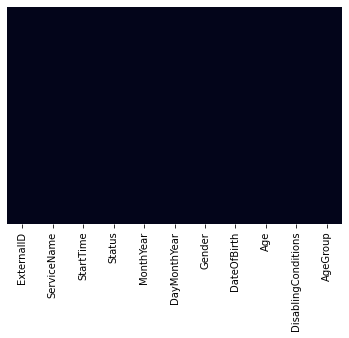

In [63]:
sns.heatmap(ACData.isnull(), yticklabels=False, cbar=False)

Plot the alarm count Box Plot based on age. We can see that there are two extreme outliers in the female customers.

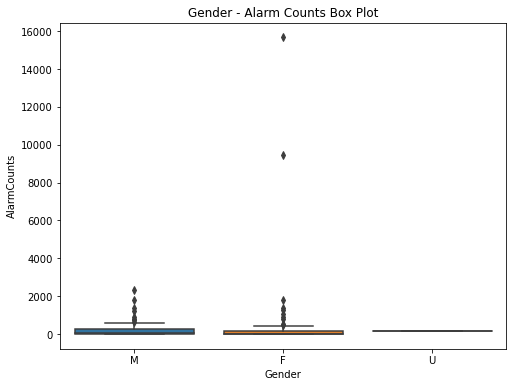

In [64]:
ID_AlarmCounts = ACData.groupby(['ExternalID', 'Gender']).size().reset_index(name='AlarmCounts')

plt.figure(figsize=(8,6))
IDA_box = sns.boxplot(x='Gender', y='AlarmCounts', data=ID_AlarmCounts)
IDA_box.set_title('Gender - Alarm Counts Box Plot')
plt.show()

#px.box(ID_AlarmCounts, x='Gender', y='AlarmCounts', color='Gender', title='Box Plot of Different Gender Alarm Counts')


We show the ten with the highest alarm counts and can see that the two IDs with the highest alarm counts are 8734 and 8739.

In [65]:
ID_AlarmCounts = ID_AlarmCounts.sort_values(by='AlarmCounts', ascending=False).reset_index(drop=True)
ID_AlarmCounts.head(10)

,ExternalID,Gender,AlarmCounts
0,8734,F,15670
1,8739,F,9444
2,8731,M,2310
3,8729,M,1817
4,5283,F,1793
5,5347,M,1356
6,5319,F,1350
7,8736,F,1263
8,8639,M,1233
9,8643,F,1045


After temporarily removing the data for both IDs 8734 and 8739, and drawing the box plot again, we can see that the number and distribution of outliers for both males and females become more similar.

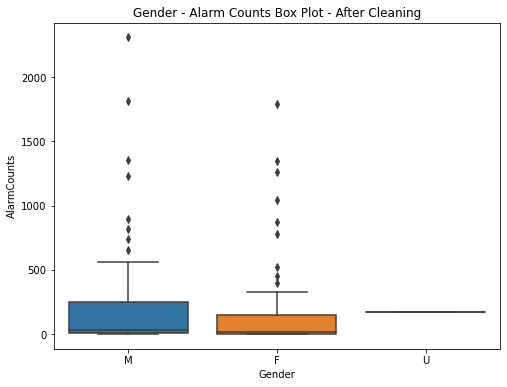

In [66]:
ID_AlarmCounts_new = ID_AlarmCounts.loc[~ID_AlarmCounts['ExternalID'].isin(['8734', '8739'])]

plt.figure(figsize=(8,6))
IDA_box_new = sns.boxplot(x='Gender', y='AlarmCounts', data=ID_AlarmCounts_new)
IDA_box_new.set_title('Gender - Alarm Counts Box Plot - After Cleaning')
plt.show()

Since the alarm data for both ID 8734 and 8739 were too outlier and could have significantly affected the statistics, I decided to remove them.

In [67]:
ACData_cl = ACData.loc[~ACData['ExternalID'].isin(['8734', '8739'])]
ACData_cl.to_csv('ACData_cl.csv',index=False,sep=',')

Next, I briefly counted and analysed the alarm data related to gender and age and combined them with the time distribution to get some insights.

In [68]:
male_num = 0
female_num = 0
unknown_num = 0

for s in ACData_cl['Gender']:
    if s == 'F':
        female_num += 1
    elif s == 'M':
        male_num += 1
    elif s == 'U':
        female_num += 1      
    else:
        print('check the data')
        
print('Number of alarms from fmales is:', female_num)
print('Number of alarms from males is:', male_num)
print('Number of alarms from unknown gender is:', unknown_num)

Number of alarms from fmales is: 12469
Number of alarms from males is: 16345
Number of alarms from unknown gender is: 0


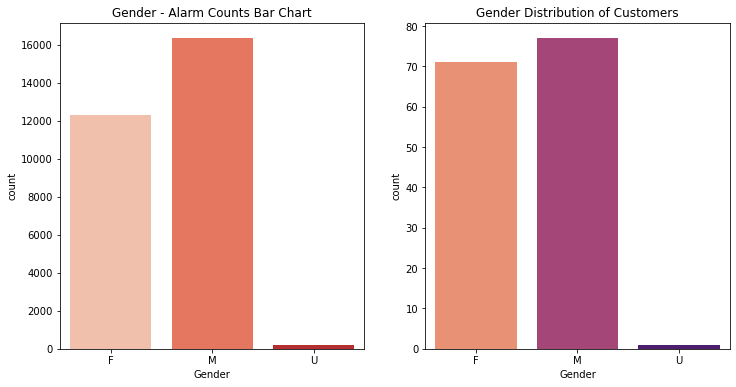

In [69]:
f, axes = plt.subplots(1, 2, figsize=(12, 6))

IDGender = ACData_cl[['ExternalID', 'Gender']]
IDGender_cl = IDGender.drop_duplicates(subset='ExternalID', keep='last')

GA = sns.countplot(x='Gender', data=ACData_cl, palette='Reds', ax=axes[0])
G = sns.countplot(x='Gender', data=IDGender_cl, palette='magma_r', ax=axes[1])
GA.set_title('Gender - Alarm Counts Bar Chart')
G.set_title('Gender Distribution of Customers')
plt.show()

**Insights:** From the above comparison of the two bar charts, it is clear that the gender distribution of the number of alarms is almost identical to the gender distribution of customers, with males being higher than females. And from the graphical proportions of the two bar charts, the overall demand for alarm service is slightly higher for males than females.

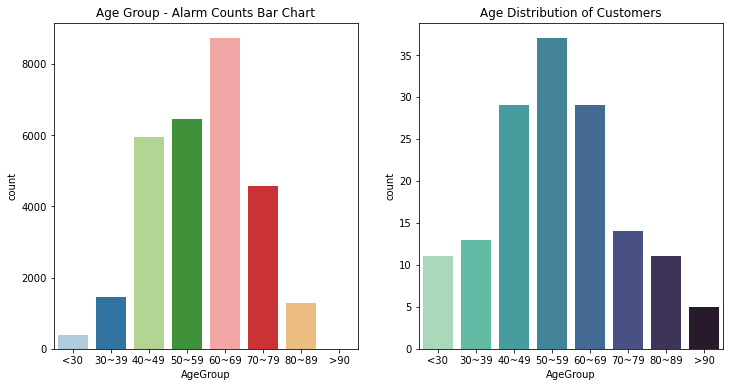

In [70]:
f, axes = plt.subplots(1, 2, figsize=(12, 6))

IDAge = ACData_cl[['ExternalID', 'AgeGroup']]
IDAge_cl = IDAge.drop_duplicates(subset='ExternalID', keep='last')

AA = sns.countplot(x='AgeGroup', data=ACData_cl, palette='Paired', ax=axes[0])
A = sns.countplot(x='AgeGroup', data=IDAge_cl, palette='mako_r', ax=axes[1])
AA.set_title('Age Group - Alarm Counts Bar Chart')
A.set_title('Age Distribution of Customers')
plt.show()

**Insights:** 50-59 year old customers had the highest number, followed by 40-49 and 60-69 year olds. Age-alarm counts, however, tell us that 60-69 year olds have the highest number of alarms at over 8,000, followed by 50-59 and 40-49 year olds at around 6,000; and 70-79 year olds have the next highest number of alarms at less than 5,000.

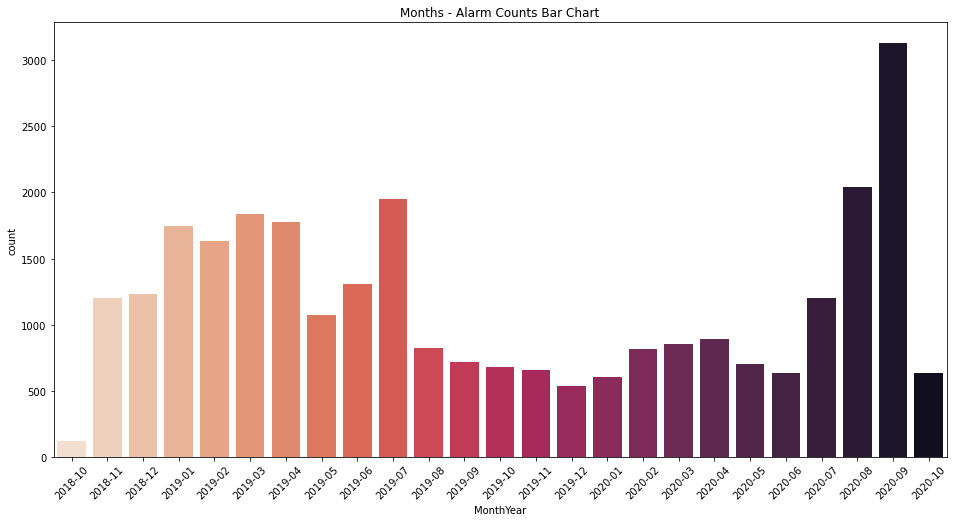

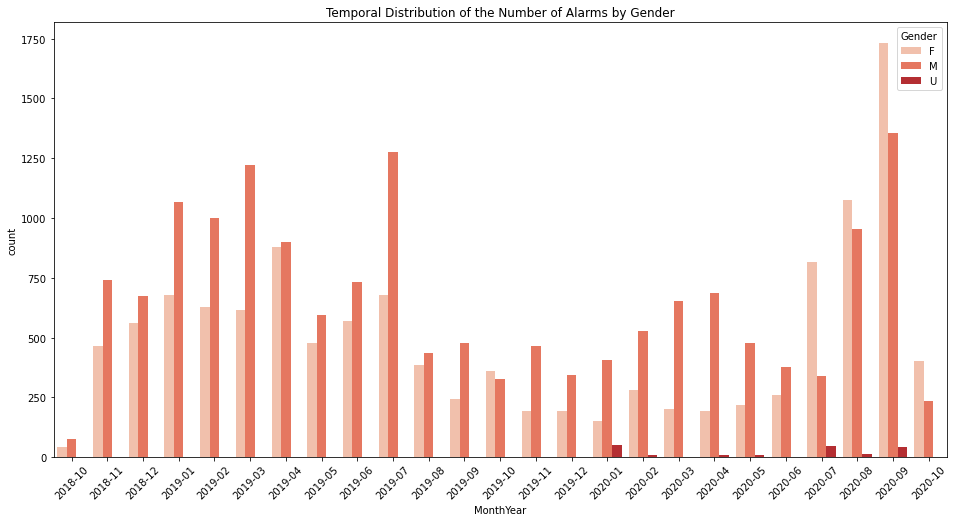

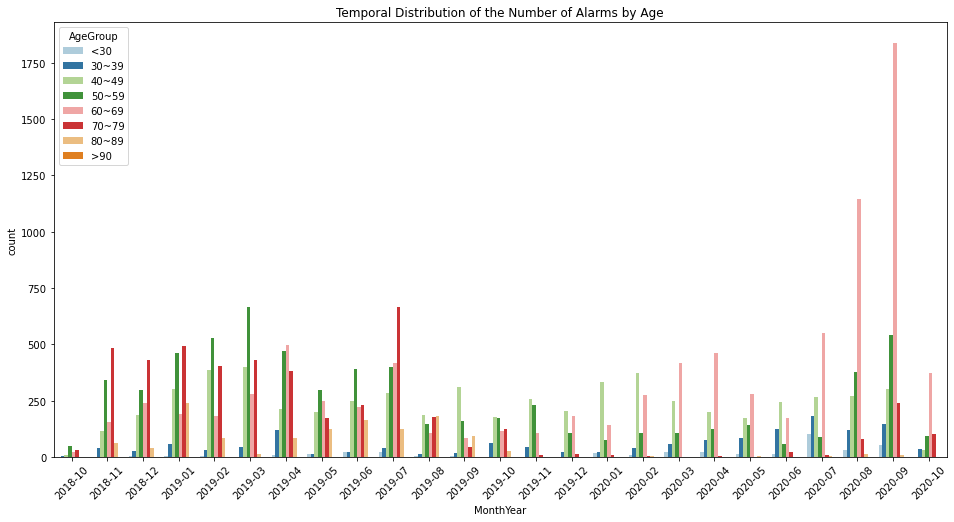

In [71]:
# Putting ACData in chronological order
ACData_cl = ACData_cl.sort_values(by='StartTime').reset_index(drop=True)

# Monthly distribution of the number of alarms
plt.figure(figsize=(16,8))
MY = sns.countplot(x='MonthYear', data=ACData_cl, palette='rocket_r')
MY.set_xticklabels(MY.get_xticklabels(),rotation=45)
MY.set_title('Months - Alarm Counts Bar Chart')
plt.show(MY)

# Monthly distribution of the number of alarms based on gender
plt.figure(figsize=(16,8))
MY_G = sns.countplot(x='MonthYear', hue='Gender', data=ACData_cl, palette='Reds')
MY_G.set_xticklabels(MY_G.get_xticklabels(),rotation=45)
MY_G.set_title('Temporal Distribution of the Number of Alarms by Gender')
plt.show()

# Monthly distribution of the number of alarms based on age group
plt.figure(figsize=(16,8))
MY_A = sns.countplot(x='MonthYear', hue='AgeGroup', data=ACData_cl, palette='Paired')
MY_A.set_xticklabels(MY_A.get_xticklabels(),rotation=45)
MY_A.set_title('Temporal Distribution of the Number of Alarms by Age')
plt.show()


**Insights:**

Drawing a bar chat of the monthly distribution of the number of alarms and combining it with gender and age, we see that -
1. the number of alarms fluctuates slightly but is generally stable from August 2019 to June 2020, but in the months of July, August and September 2020, the number of alarms rises significantly month by month, with September 2020 having the highest number of alarms for the entire time period included in the table.
2. The number of females' alarms exceeded those of males in all months from July 202. In the vast majority of the previous months, the number of alarms for males significantly exceeded the number of alarms for females.
3. the number of alarms for people aged 60-69 was the highest of all age groups in most months from March 2020, with only June 2020 ranking second. In contrast, in the vast majority of the previous months, it is usually the 50-59 and 70-79 year olds who have the highest number of alarms. In addition, July, August and September 2020 saw the most significant increase in the number of alarms for customers aged 60-69.

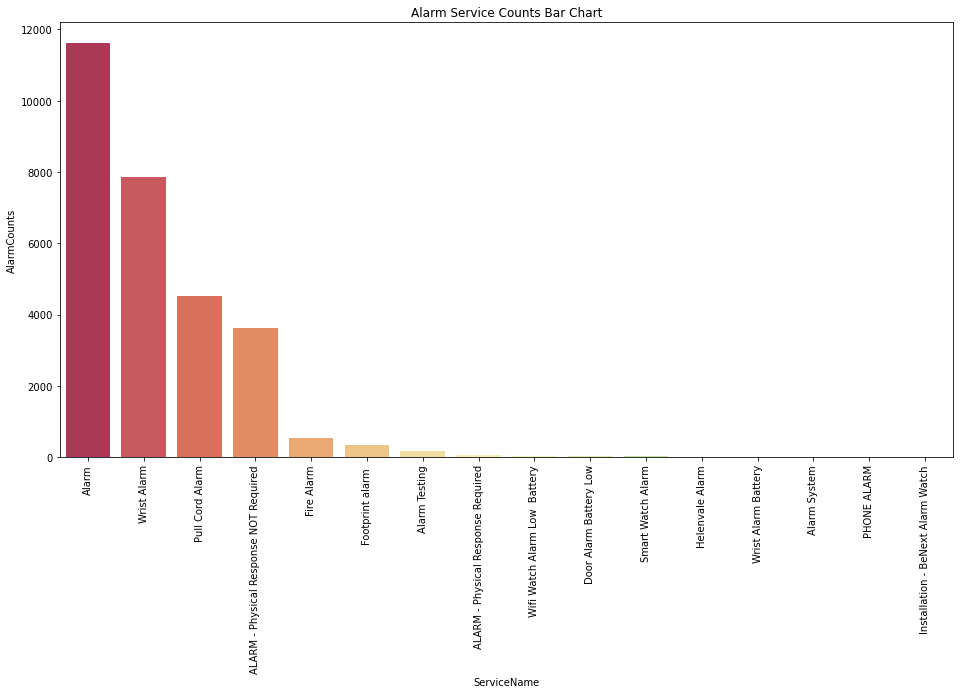

                              ServiceName  AlarmCounts
0                                   Alarm        11618
1                             Wrist Alarm         7869
2                         Pull Cord Alarm         4510
3  ALARM - Physical Response NOT Required         3613
4                              Fire Alarm          543
5                        Footprint alarm           341
6                           Alarm Testing          162
7      ALARM - Physical Response Required           59
8           Wifi Watch Alarm Low  Battery           25
9                  Door Alarm Battery Low           24


In [72]:
ServiceCounts = ACData_cl['ServiceName'].value_counts().reset_index()
ServiceCounts.columns = ['ServiceName', 'AlarmCounts']

# Distribution of types of alarms
plt.figure(figsize=(16,8))
SC_bar = sns.barplot(x='ServiceName', y='AlarmCounts', data=ServiceCounts, palette='Spectral')
SC_bar.set_xticklabels(SC_bar.get_xticklabels(), rotation=90)
SC_bar.set_title('Alarm Service Counts Bar Chart')
plt.show()

print(ServiceCounts.head(10))

**Insights:** The Alarm and Wrist Alarm types have the highest numbers of all alarm services, followed by Pull Cord Alarm and Alarm - Physical Response Not Requirements. The rest of the alarm types have very small percentages.

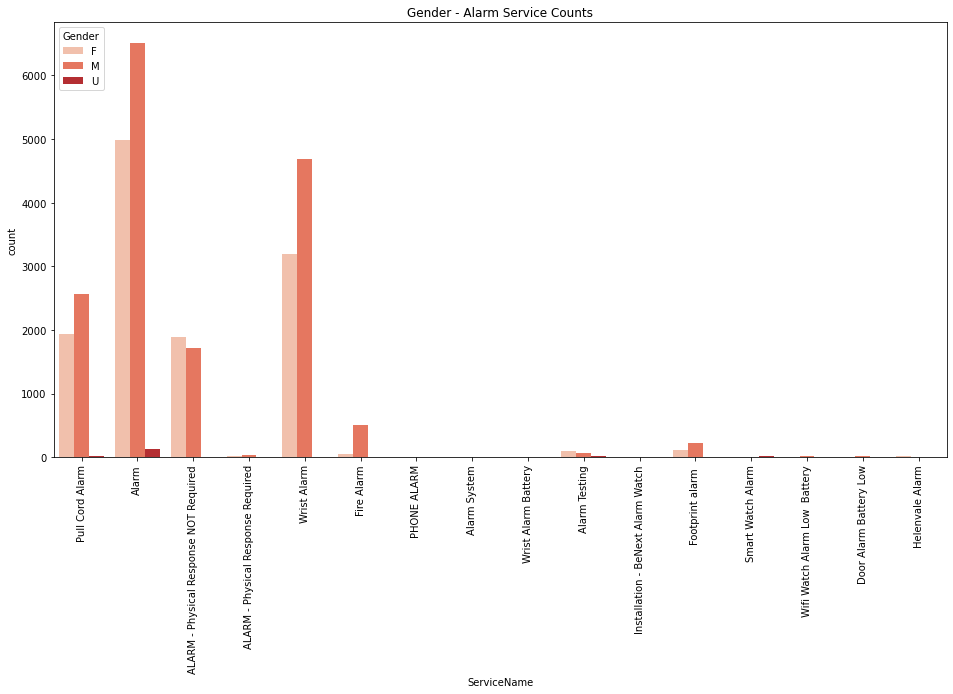

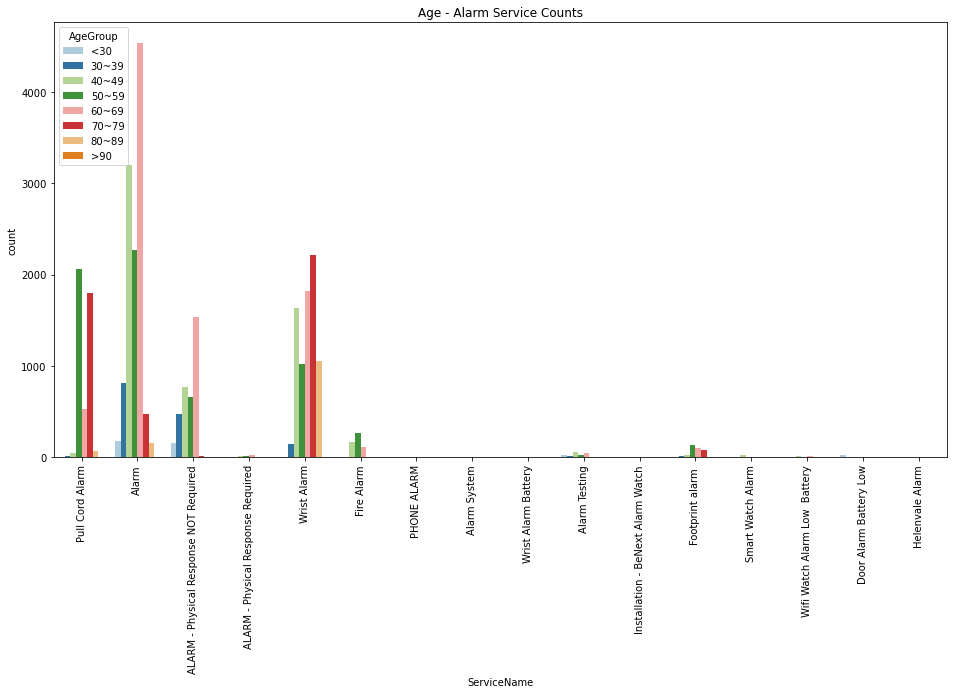

In [73]:
# Month-based distribution of alarm types
plt.figure(figsize=(16,8))
SN_G = sns.countplot(x='ServiceName', hue='Gender', data=ACData_cl, palette='Reds')
SN_G.set_xticklabels(SN_G.get_xticklabels(), rotation=90)
SN_G.set_title('Gender - Alarm Service Counts')
plt.show()

# Age-based distribution of alarm types
plt.figure(figsize=(16,8))
SN_A = sns.countplot(x='ServiceName', hue='AgeGroup', data=ACData_cl, palette='Paired')
SN_A.set_xticklabels(SN_G.get_xticklabels(), rotation=90)
SN_A.set_title('Age - Alarm Service Counts')
plt.show()

**Insights:**
1. In the two most numerous alarm service types, Alarm and Wrist Alarm, males had a higher number of alarms than females, but in the Alarm - Physical Response Not Requirements type, females slightly outnumbered males.
2. In Alarm, the highest number of alarms were in the 60-69 age group and fewer in the 70-79 age group (less than 500 alarms). While in both Wrist Alarm and Pull Cord Alarm, the number of alarms in the 70-79 age group was high and the number of alarms in the 60-69 age group was relatively low.

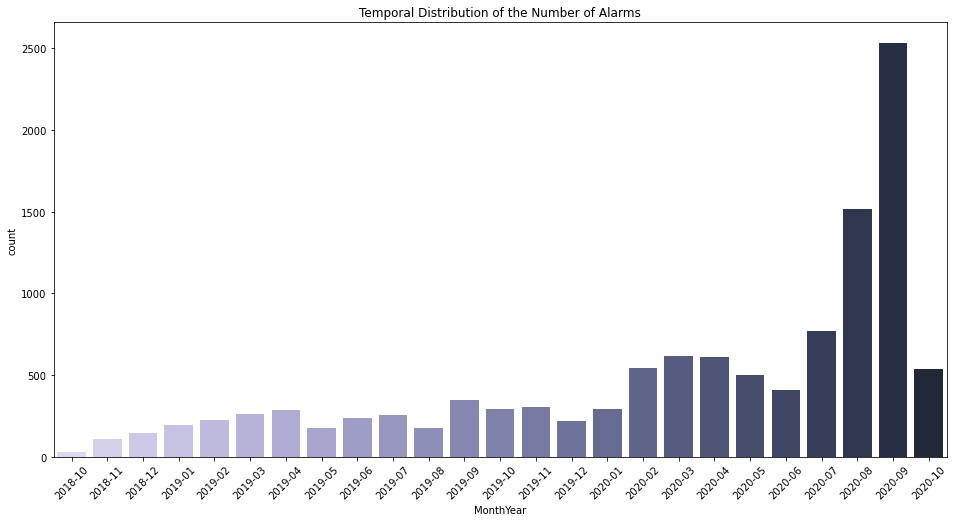

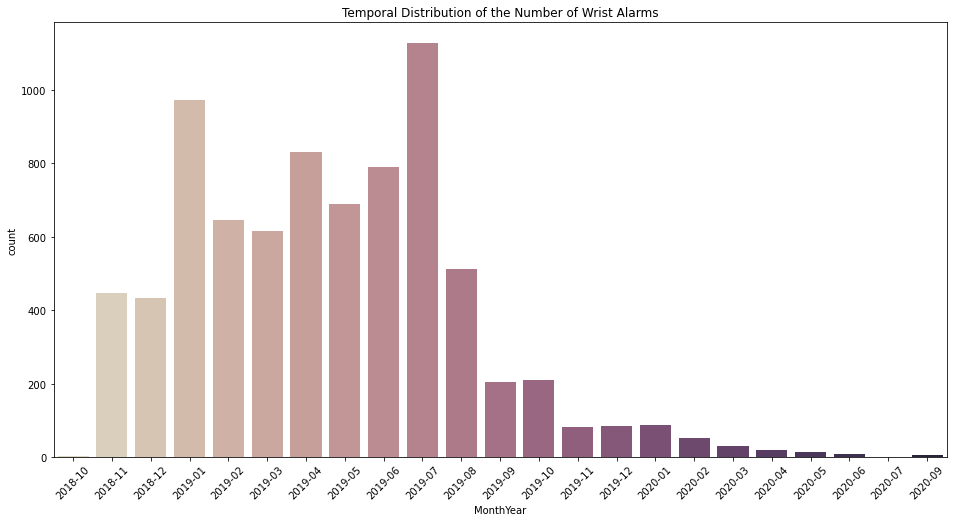

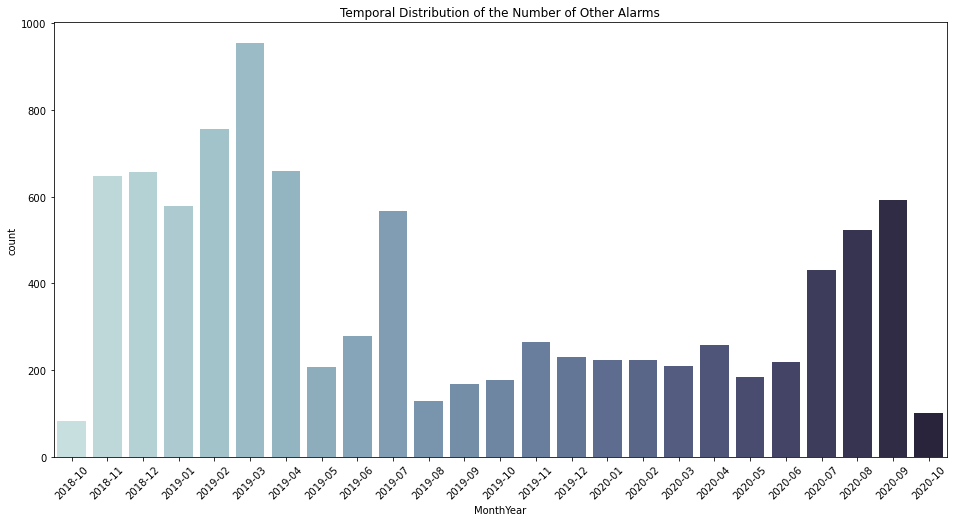

In [74]:
# Time distribution of the number of Alarm
Alarm = ACData_cl.loc[(ACData_cl['ServiceName']=='Alarm')]
plt.figure(figsize=(16,8))
MY_Alarm = sns.countplot(x='MonthYear', data=Alarm, palette='ch:s=2.8,r=.1')
MY_Alarm.set_xticklabels(MY_Alarm.get_xticklabels(), rotation=45)
MY_Alarm.set_title('Temporal Distribution of the Number of Alarms')
plt.show()

# Time distribution of the number of Wrist Alarm
WristAlarm = ACData_cl.loc[(ACData_cl['ServiceName']=='Wrist Alarm')]
plt.figure(figsize=(16,8))
MY_WristAlarm = sns.countplot(x='MonthYear', data=WristAlarm, palette='ch:s=-.2,r=.6')
MY_WristAlarm.set_xticklabels(MY_WristAlarm.get_xticklabels(), rotation=45)
MY_WristAlarm.set_title('Temporal Distribution of the Number of Wrist Alarms')
plt.show()

# Time distribution of the number of Other Alarm
OtherAlarm = ACData_cl.loc[~(ACData_cl['ServiceName'].isin(['Alarm','Wrist Alarm']))]
plt.figure(figsize=(16,8))
MY_OtherAlarm = sns.countplot(x='MonthYear', data=OtherAlarm, palette='ch:s=.2,r=-.3')
MY_OtherAlarm.set_xticklabels(MY_OtherAlarm.get_xticklabels(), rotation=45)
MY_OtherAlarm.set_title('Temporal Distribution of the Number of Other Alarms')
plt.show()

**Insights:**
1. the number of Alarms is stable and low throughout 2019; in the first half of 2020, their number rises slightly and then falls back, before rising sharply in July, August and September.
2. the number of Wrist Alarms remains high until August 2019, but declines significantly from September 2019 onwards, and is almost infrequent in 2020.
3. The monthly distribution of the number of other alarm types is more similar to the monthly distribution of the total number of alarms.

## Reflect and Hypothesise

### Data Reflection

#### What's my data? What do I focus on?
Our group was given data from an agency that provides housing and care services for older and disabled people, and it mainly contains some of the basic information about customers (age, gender, health conditions, etc.) as well as data on various types of service requests. I mainly chose to explore the relationship between customers of different ages and genders and alarm services.
#### What difficulties did I encounter?
‘Real-world data is so confusing!’ This is the idea that came up most often when I was first trying to read the data and trying to clean it. I have so many confusing things: why are there so many null values, why do the same IDs have several lines of different information, what service types do these refer to specifically, what do the start time, end time, response time ...... mean respectively? I had to set aside the data that I was having trouble reading at the moment and start with some of the more understandable parts of the cleaning and analysis.

Real data is also very tricky. For example, some columns had data types that were not suitable for subsequent analysis and had to be converted. Others are too fine-grained, such as time and date data that is accurate down to the minute, and in order to spot some patterns from a more macro perspective, I need to convert them again to month-based units. Outliers are also tricky to analyse, and I currently have no way of knowing or explaining why some customers have dozens or even hundreds of alarm requests per day that can only be deleted on the grounds that ‘If keeped it will affect the data analysis too much.’ This is likely to be unwise and I might have made a better decision if I had more time and had more background information relating to the data.
#### What's the point of my analysis?
Analysing this data has very important practical implications. First, by analysing the relationship between different characteristics and the number of alarm services, it can help Blackwood understand the specific service preferences of current customers of a certain type (e.g., a certain age group). Second, analysis in the time dimension can reflect the influence of specific factors (e.g., Covid-19 in this year) on the behavior of customers with different characteristics.

### Hypothesis

#### Hypothesis 1: There is a stronger correlation between alarm requests and Covid-19 in 2020.
By comparing the bar chart below for the post-March 2020 section with the bar chart for the UK Covid-19's tested positive cases https://coronavirus.data.gov.uk/details/cases , we can see that their data changes have a significant similarity, so I suspect that ‘There is a relatively strong correlation between alarm requests and Covid-19 in 2020 ’.

For further validation, the correlation between the March-October 2020 alarm request data and the number of positive COVID-19 tested cases in the UK during March-October 2020 can be tested by T-Test. If the p-value is less than 0.05, the correlation is significant. However, prior to the T-Test, the Kolmogorov-Smirnov Test should be used to verify that the two datasets are normally distributed.

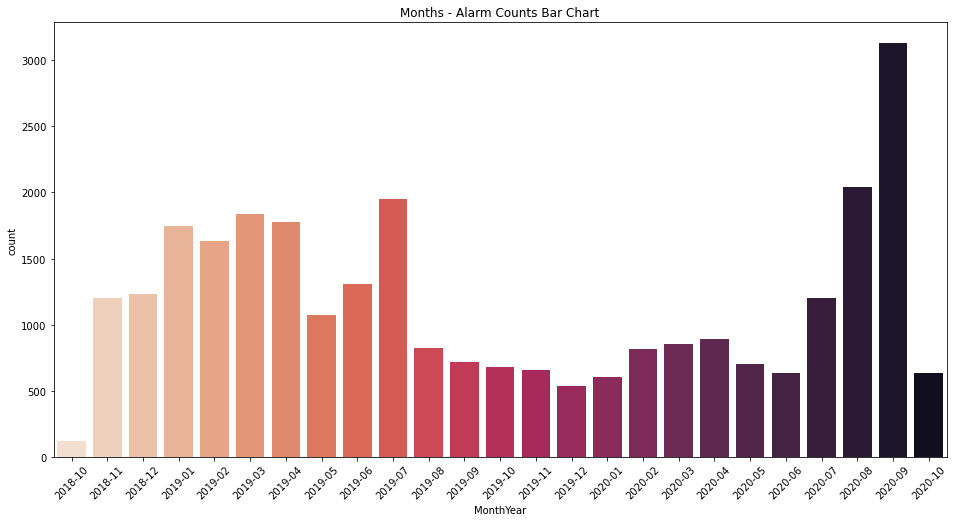

In [75]:
plt.figure(figsize=(16,8))
MY = sns.countplot(x='MonthYear', data=ACData_cl, palette='rocket_r')
MY.set_xticklabels(MY.get_xticklabels(),rotation=45)
MY.set_title('Months - Alarm Counts Bar Chart')
plt.show(MY)

#### Hypothesis 2: From July-September 2020, the group with the highest demand for alarms is females aged 60-69, based on age and gender.
As you can see from the two bar charts below, July-September 2020 saw the most significant increase in both females and customers aged 60-69, so I hypothesize that the group with the highest demand for alarms during this time period is females aged 60-69.

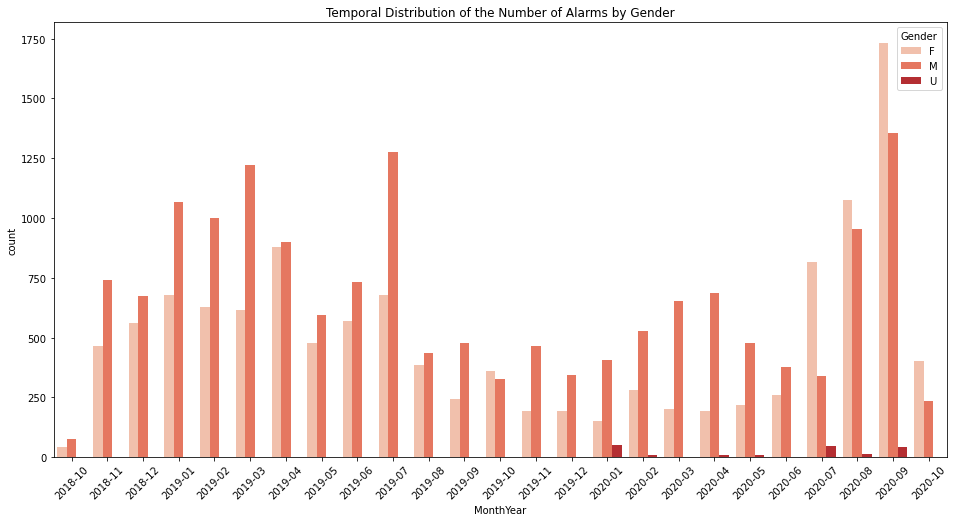

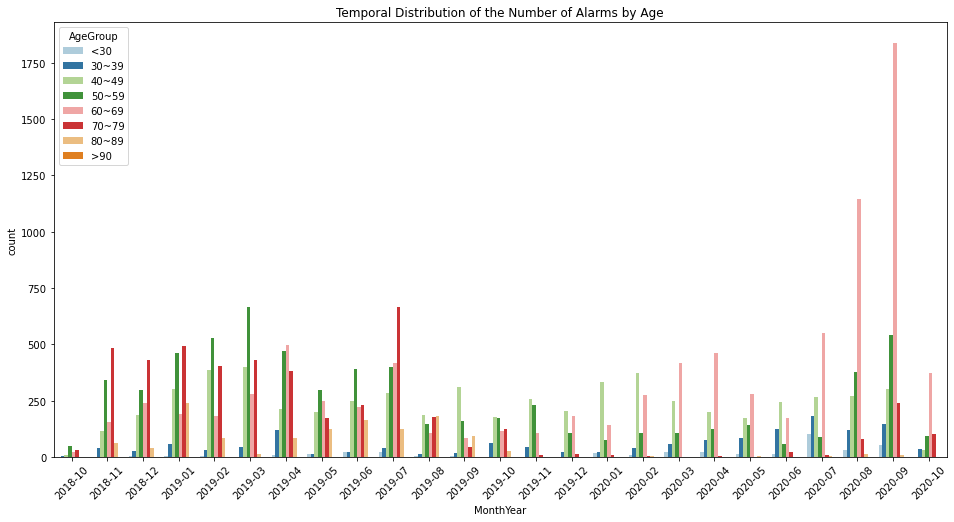

In [76]:
# Monthly distribution of the number of alarms based on gender
plt.figure(figsize=(16,8))
MY_G = sns.countplot(x='MonthYear', hue='Gender', data=ACData_cl, palette='Reds')
MY_G.set_xticklabels(MY_G.get_xticklabels(),rotation=45)
MY_G.set_title('Temporal Distribution of the Number of Alarms by Gender')
plt.show()

# Monthly distribution of the number of alarms based on age group
plt.figure(figsize=(16,8))
MY_A = sns.countplot(x='MonthYear', hue='AgeGroup', data=ACData_cl, palette='Paired')
MY_A.set_xticklabels(MY_A.get_xticklabels(),rotation=45)
MY_A.set_title('Temporal Distribution of the Number of Alarms by Age')
plt.show()

To test this hypothesis, I tried to extract the alarm data for all age groups of customers of different genders from July-September 2020 and show their distribution in a bar chart. As you can see, the number of alarms for females aged 60-69 years is 2251, which is the highest among all groups and therefore fits my conjecture. Combined with hypothesis 1, we can further conjecture that **females aged 60-69 are most affected by Covid-19 in July-September ...**

      ExternalID                             ServiceName           StartTime  \
21806       8724  ALARM - Physical Response NOT Required 2020-07-01 03:38:00   
21807       8724                                   Alarm 2020-07-01 03:38:00   
21825       5541                                   Alarm 2020-07-01 13:07:00   
21830       5385                                   Alarm 2020-07-01 14:50:00   
21831       5541                                   Alarm 2020-07-01 15:54:00   

          Status MonthYear DayMonthYear Gender DateOfBirth  Age  \
21806  completed   2020-07   2020-07-01      F  1958-09-24   62   
21807  completed   2020-07   2020-07-01      F  1958-09-24   62   
21825  completed   2020-07   2020-07-01      M  1954-02-18   66   
21830     active   2020-07   2020-07-01      M  1952-09-01   68   
21831  completed   2020-07   2020-07-01      M  1954-02-18   66   

                                     DisablingConditions AgeGroup  
21806                                         Pa

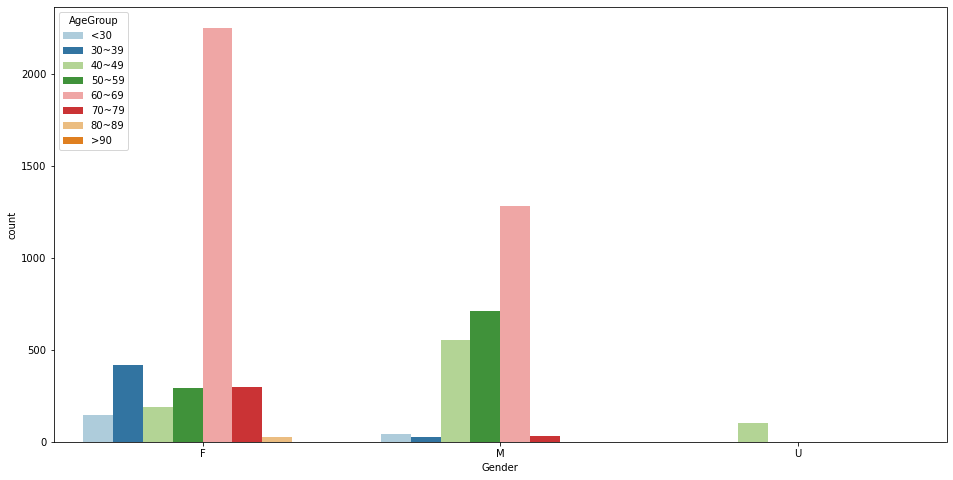

In [77]:
Months = ACData_cl.loc[ACData_cl['DayMonthYear'].between('2020-06-30','2020-10-01', inclusive=False)]
MonthsAge = Months.loc[Months['AgeGroup'].isin(['60~69'])]
print(MonthsAge.head())
print(MonthsAge['Gender'].value_counts())

plt.figure(figsize=(16,8))
GMA = sns.countplot(x='Gender', hue='AgeGroup', data=Months, palette='Paired')
plt.show()

#### Hypothesis 3: Wrist Alarm is being phased out or replaced from September 2019 onwards.
As you can see from the two bar chats below, the number of Wrist Alarms begins to decline significantly from September 2020 onwards, and by 2020 this alarm service is rare; whereas the number of Alarms is on a general upward trend from 2020 onwards, and rises significantly in July, August and September. These two seemingly opposing graphs lead me to hypothesize that the Wrist Alarm may be flawed and therefore gradually being phased out or replaced.

To test this hypothesis, I would need to ask the data owner if they have plans to begin phasing out and replacing their Wrist Alarm Service in 2019.

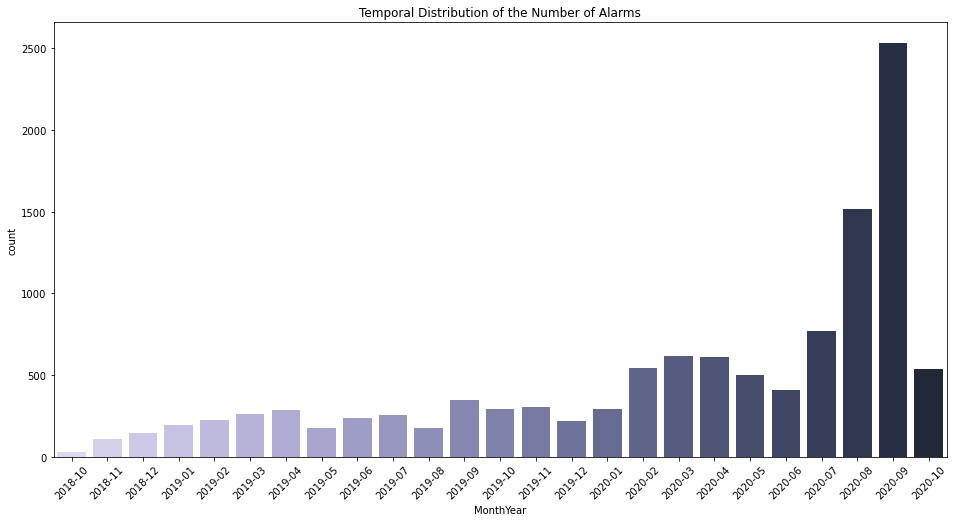

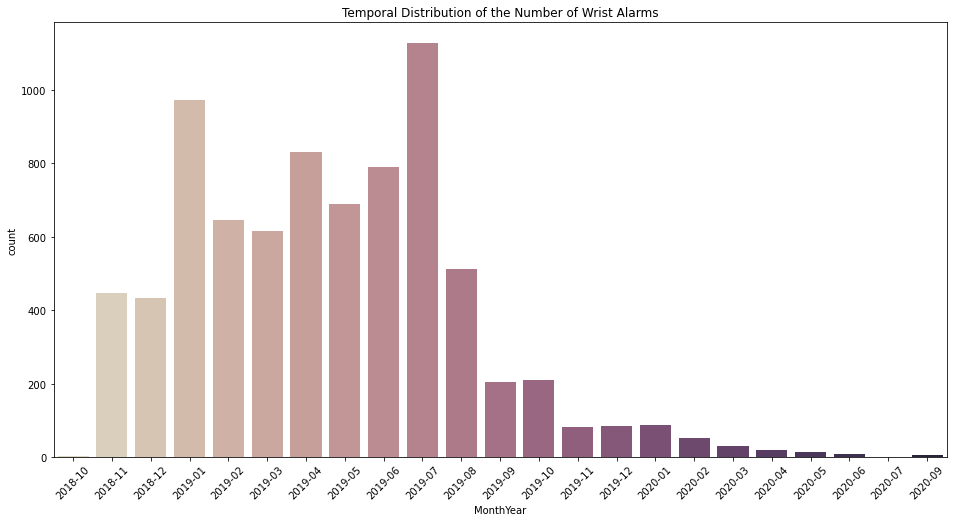

In [78]:
# Time distribution of number of alarms
Alarm = ACData_cl.loc[(ACData_cl['ServiceName']=='Alarm')]
plt.figure(figsize=(16,8))
MY_Alarm = sns.countplot(x='MonthYear', data=Alarm, palette='ch:s=2.8,r=.1')
MY_Alarm.set_xticklabels(MY_Alarm.get_xticklabels(), rotation=45)
MY_Alarm.set_title('Temporal Distribution of the Number of Alarms')
plt.show()

# Time distribution of number of wrist alarms
WristAlarm = ACData_cl.loc[(ACData_cl['ServiceName']=='Wrist Alarm')]
plt.figure(figsize=(16,8))
MY_WristAlarm = sns.countplot(x='MonthYear', data=WristAlarm, palette='ch:s=-.2,r=.6')
MY_WristAlarm.set_xticklabels(MY_WristAlarm.get_xticklabels(), rotation=45)
MY_WristAlarm.set_title('Temporal Distribution of the Number of Wrist Alarms')
plt.show()